In [2]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as c
from dust_extinction.averages import GCC09_MWAvg

# The Signal-to-Noise Equation

<div class="alert alert-block alert-success">
    <b> Key Question </b>

How do we estimate whether a telescope will be able to detect a given source?
</div>

## Optical

Now imagine we wish to measure the signal-to-noise(SNR) ratio of a star. This is given by:
$$
    {\rm SNR} = \frac{Signal}{Noise}
$$
For a CCD, there are 4 main sources of noise:
- Shot noise due to $S_0$ photons from the source, $\sigma_0=\sqrt S_0$
- Shot noise due to $S_b$ photons from the background, $\sigma_b=\sqrt S_b$
- Shot noise due to $S_d$ counts casued by the thermal properties of the CCD, $\sigma_d=\sqrt S_d$.
- A time independant readout out noise, $\sigma_R=R$. This is not a square root, and is the standard deviation in the number of electrons measured at the readout step.

Let's assume all of these processes are independant. We are also going to assume they all involve high enough numbers that they are Gaussians. As such, the variance of the sum is the sum of the variances, $\sigma_{\rm Total}^2 = \sigma_0^2+\sigma_b^2+\sigma_d^2+\sigma_R^2$. As such, the noise term, $N=\sigma_{\rm Total}$, is given by
$$
    N = \sqrt{S_0+S_b+S_d+R^2}
$$
and thus the Signal-to-Noise ratio is given by
$$
    {\rm SNR} = \frac{S_0}{\sqrt{S_0+S_b+S_d+R^2}}.
$$
This is the most basic form of this equation. Note that $S_0$, $S_b$, and $S_d$ will all scale linearly with exposure time.

There are 3 limiting cases for the basic form of the equation.

1. **Object limited: $S_0 >> S_b,S_d,R^2$**.
    In this case, the equation simplifies to ${\rm SNR}=\frac{S_0}{\sqrt S_0}=\sqrt {S_0}$. Since the number of counts detected, $S_0$, is proportional to time, then SNR $\propto \sqrt{t}$. This means you eventually get diminishing returns on increasing your exposure time. Additionally, $S_0$ is proportional to $D^2$, where D is the aperture of the telescope. As such, SNR $\propto D$.
2. **Background limited: $S_b >> S_0,S_d,R^2$**
    In this case, we get  ${\rm SNR}=\frac{S_0}{\sqrt S_b}$. Both $S_0$ and $S_b$ scale the same way with exposure time and telescope aperture, and the SNR scales the same as in the above. For fixed $S_0$, the SNR scales with the square root of the background signal - so if your background increases (because for example the moon rises), the SNR drops. This is important in determining when to observer your targets - can they withstand a bright moon, or do you need no moon at all?
3. **Read noise limited: $R^2 >> S_0,S_b,S_d$**
    Read noise is indepedant of exposure time, so this typically only occurs for short exposures. ${\rm SNR}=\frac{S_0}{R}$. In this regime, since $R is time independant, SNR scales linearly with time and with the square of the aperture.

# Infrared Astronomy

Recall Wien's displacement law, which states that
$$
    \lambda \: T = {\rm constant} = 2898  {\rm \mu m \: K}
$$
So stars with a temperature of 2500 Kelvin will peak in Intensity at a wavelength of $1.2$ $\mu$m. So if we want to observed the coolest stars (M-dwarfs), around which we've found a lot of exoplanets (which are also very cold objects), then we need to move to infrared wavelengths. This region is also where we're likely to see the optical spectra of highly redshifted Galaxies, making this a very important window for astronomy.

One of the largest issues comes from the thermal radiation produced by the sky and the telescopes themselves. IR instruments are typically cooled to minimise these effects, normally with liquid He. This of course means they have limited lifespans - the helium on the Spitzer space telescope lasted for 5 years.

1-5 $\mu$m observations can be done from the ground, but above this, it is much better to go to space (especially > 25 $\mu$m).

IR astronomy comes with one other major advantage over Optical astronomy. The effects of interstellar extinction are far weaker at IR wavelengths than at optical wavelengths.

Typically, when discussing interstellar extinction, a value is given as $A_{\rm V}$. This represents the magnitude of light absorbed due to interstellar extinction in the Johnson V band. So $A_{\rm V}=5$ means 5 mags are absorbed at V band, and so an object will appear 100 times fainter in the night sky than it should. The below figure shows extinction as a function of wavelength - it is stronger at short wavelengths, meaning it affects optical astronomy quite significantly.

Very roughly, there is a linear dependance on $A_{\rm V}$ with distance, with $A_{\rm V}=1$ corresponding to a rough distance of 1 kpc.

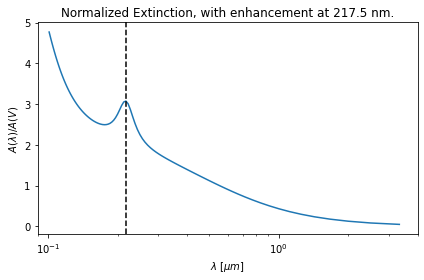

Ratio of extinction in K band to V band is: 0.12533034482999322


In [3]:
fig, ax = plt.subplots(figsize=[6,4],ncols=1)

# generate the curves and plot them
x = np.arange(0.3,10.0,0.1)/u.micron
ext_model = GCC09_MWAvg()

ax.plot(1./x,ext_model(x))

ax.set_title('Normalized Extinction, with enhancement at 217.5 nm.')
ax.set_xlabel('$\lambda$ [$\mu m$]')
ax.set_ylabel('$A(\lambda)/A(V)$')
ax.set_xscale('log')
ax.set_xlim(0.09,4.0)
ax.axvline(0.2175,linestyle='--',color='k')

plt.tight_layout()
plt.savefig("Figures/Extinction_Curve.png")
plt.show()

print("Ratio of extinction in K band to V band is:",ext_model(2*u.micron))

<div class="alert alert-block alert-info">
    <b>Example: A star with $A_{\rm V}=10$</b>

Imagine we are observing a star through a dust cloud, and that $A_{\rm V}=10$ mag. The extintion at K band (which is at 2 $\mu$m) would be:
$$
    \frac{A_{\rm K}}{A_{\rm V}}=0.1253303\\
    A_{\rm K}=10\times0.1253303=1.2
$$
So there's only 1.2 mags of extinction at the K band. Now if we assume that the object is equally bright in both V and K bands, that means the object is ~ 3000 brighter in the K band than in the V band!
</div>

So, observing at IR wavelengths allows us to see objects which are heavily obscured by dust at optical wavelengths, such as star forming regions, galactic centres, etc!

# Radio Astronomy

Karl Jansky observed the first radio waves coming from our Galaxy, when he found evidence for periodic radio emission. He first thought it was from the Sun, but after several months of observations, he found the period to be 23 hr and 56 min, and was coming from the centre of the Milky Way.

The strength of radiation from a radio source is typically given by the Spectral Flux Density, $S(\nu)$, and normally has units of Jy (1 Jy = $1\times10^{-26}$ W/m$^2$/Hz). This turns out to be a very bright unit. The most common astrophysical sources are typically in the mJy to $\mu$Jy range.

Imagine a telescope has efficiency of $f(\nu)$ at $\nu$. The power recieved by the telescope from a source is then given by

$$
    P=\int_A \int_\nu S(\nu)f(\nu) d\nu dA
$$

where A is the collecting area of your telescope.

If $S(\nu)$ is constant over the frequency range of interest $\Delta\nu$, and if our efficiency is 1, then

$$
    P=S \: A \: \Delta \nu \: (\rm Watts)
$$

## Interferometry

Now, let's consider the Rayleigh criteria from the last lecture again. Assuming an observing wavelength $\lambda=10cm$, and a dish with diameter 50m. The resolution of such a telescope is  roughly 8 arcmins.

Now, consider two radio dishes, separated by a distance L, and joined by a correlator. The path difference between the two telescopes for incoming photons, $c \: t$, is given by $c \: t=L\sin(\theta)$. Because of this path difference, the photons arriving at the two dishes are out of phase with each other. By design or through use of time delay, we can ensure that $c \: t=n \: \lambda$, where $n$ is an integer. As such, the photons arriving at telescope 1 and 2 can be constructively interferred. This then means that $n \lambda = L\sin(\theta)$. At this stage, the entire setup becomes analogous to Young's Double Slit experiment.

Now assume that the angle $\theta$ changes by a small angle $\Delta \theta$. The difference between the new and old time delay,$c \Delta t$, is given by $c \Delta t \sim L\Delta \theta$. 

In order for the photons to constuctively interfer again, and for us to see a maximum in intensity in our interference pattern, the change in the path length must at least $c \Delta t \sim \lambda$ - if it is less, the photons will not. Thus, in order to see another peak in the inteference pattern, the minimum angular distance is given by  $\Delta \theta \sim \frac{\lambda}{L}$.

![SingleSlit](Figures/Interferometry.png)

This gives the approximate resolution of a interferometer. If $L$ is large, then $\Delta \theta$ is very small.

<div class="alert alert-block alert-info">
    <b>Very Long Baseline Interferometry (VLBI)</b>

Imagine we had 2 dishes separated by the diamter of the Earth, and observing at 10cm. The resolution of the combined dishes would be $1.6\times10^{-3}$ arcseconds!
    
</div>